In [1]:
import pandas as pd

exercise = pd.read_csv("exercise.csv")

In [2]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
y     40 non-null float64
x1    60 non-null float64
x2    60 non-null float64
dtypes: float64(3)
memory usage: 1.5 KB


In [3]:
# let's see what's inside
exercise

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [7]:
# Wczytać plik do dataframe'a

df = pd.DataFrame(exercise,columns=['y','x1','x2'])

#separate known info data from rest 
available_info = df[:40]

# Create array with data provided for prediction
for_prediction = df[40:60]
df.describe()

,y,x1,x2
count,40.000000,60.000000,60.000000
mean,13.590250,5.323500,10.994167
std,5.279126,3.188782,5.904045
min,3.290000,0.190000,0.350000
25%,9.325000,2.527500,5.760000
50%,15.590000,5.525000,12.685000
75%,18.002500,8.292500,15.745000
max,21.630000,9.990000,19.680000


In [5]:
# dopasować model regresji liniowej przewidujący y z x1, x2, używając pierwszych 40 punktów danych w pliku.

import statsmodels.api as sm

X = available_info[['x1','x2']]
Y = available_info['y']
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        13:27:43   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

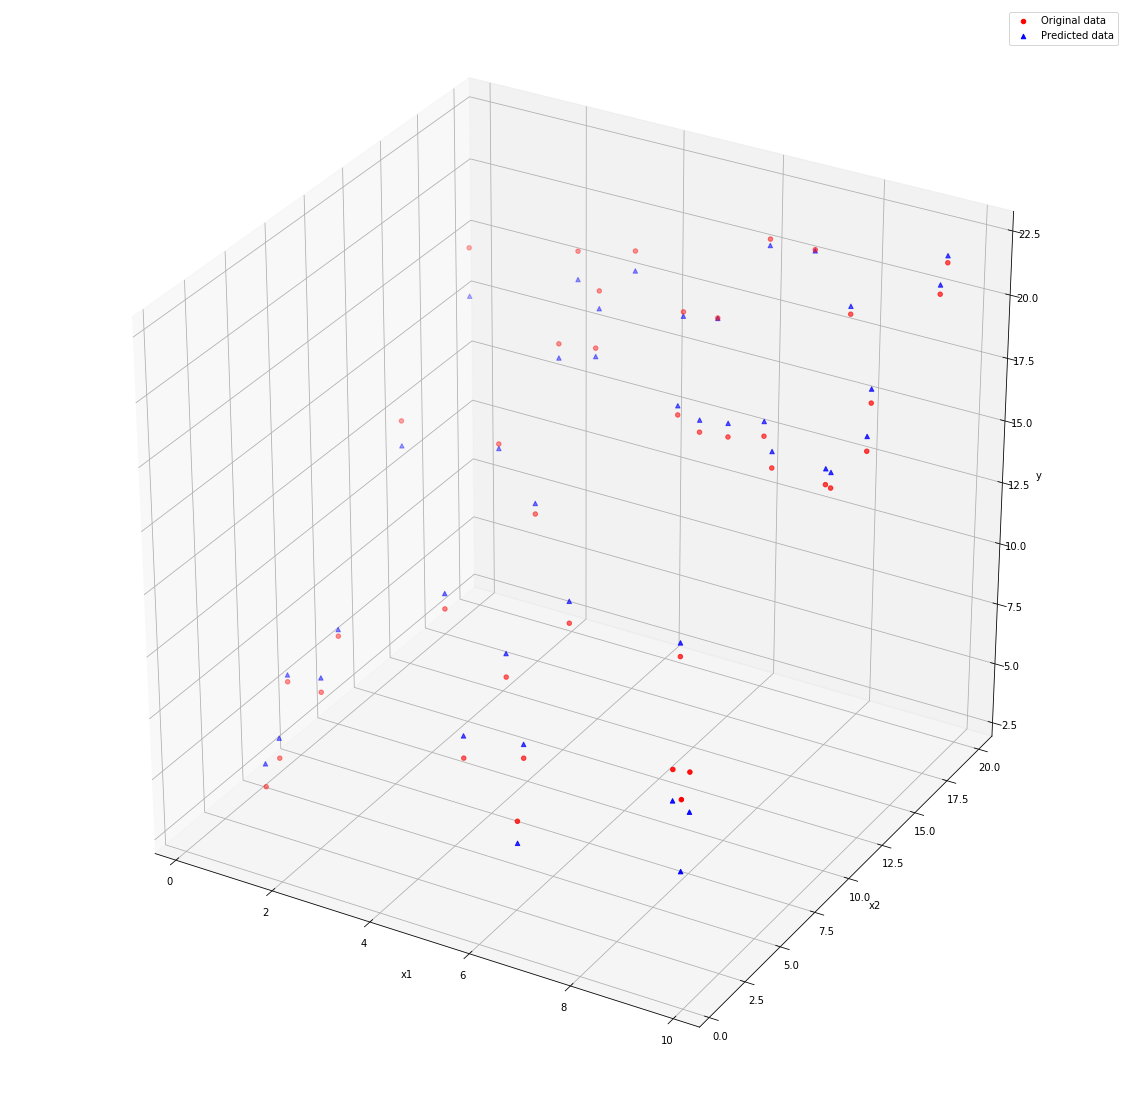

In [10]:
# Podsumować wnioski i sprawdźić dopasowanie modelu. - sprawdzam graficznie wykorzystując wykres
# Wyświetl oszacowany model graficznie

# Wnioski: współczynnik przy zmiennej x2 jest większy niż przy zmiennej x1, więc można powiedzieć,
# że jej znaczenie w regresji jest większe. Niska wartość składowej stałej.

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xs = available_info['x1']
ys = available_info['x2']
zs = available_info['y']
ax.scatter(xs, ys, zs, c='r', marker='o', label='Original data')


xs = available_info['x1']
ys = available_info['x2']
zs = predictions
ax.scatter(xs, ys, zs, c='b', marker='^', label='Predicted data')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.legend()
plt.show()

0    -0.541378
1    -0.910400
2     1.966323
3    -0.630421
4     0.715394
5    -0.886653
6     0.045077
7     2.854778
8    -0.958536
9     0.893360
10   -0.367014
11   -0.480263
12    0.253753
13   -0.310290
14    1.591616
15    0.570807
16    0.013661
17    1.021517
18   -0.428169
19    0.172692
20   -0.580425
21    0.339501
22    1.142405
23   -0.625805
24   -0.834170
25   -0.651788
26    0.183580
27   -0.360813
28   -0.583082
29   -0.596613
30   -0.958042
31    1.250612
32   -0.549235
33   -0.286295
34    0.798246
35   -0.613969
36   -0.561885
37   -0.273629
38   -0.550868
39   -0.273580
dtype: float64


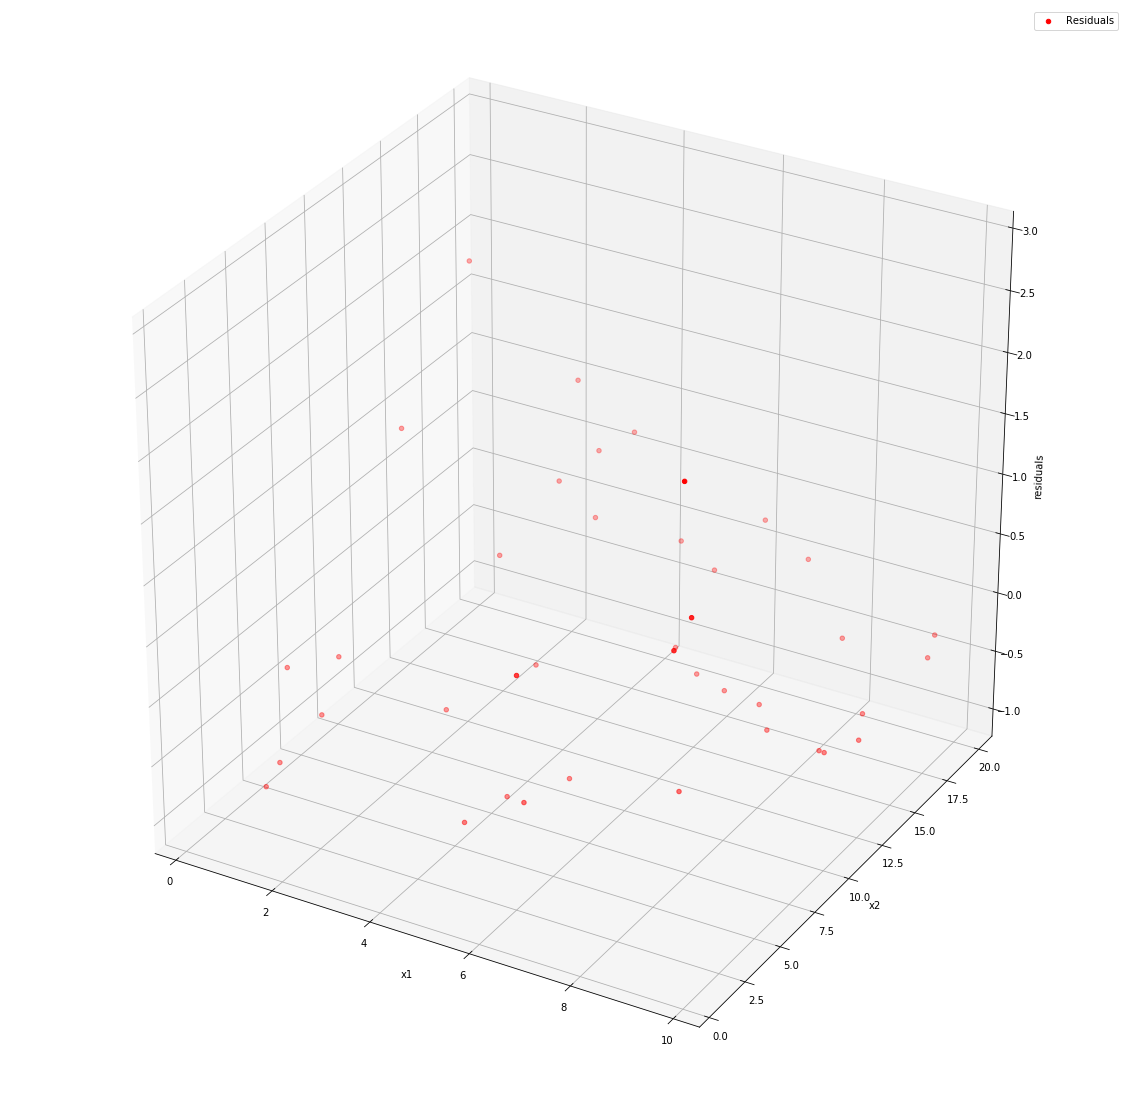

In [7]:
# Wykonaj wykres residuów dla tego modelu. Czy wydaje się, że założenia zostały spełnione?

# Odp.: Residua są małe, można powiedzieć że założenia zostały spełnione.

residuals = available_info['y'] - predictions
print(residuals)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xs = available_info['x1']
ys = available_info['x2']
zs = residuals
ax.scatter(xs, ys, zs, c='r', marker='o', label='Residuals')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('residuals')

plt.legend()
plt.show()

In [8]:
# Wykonaj prognozy dla pozostałych 20 punktów danych w pliku. Oceń pewność co do prognozach?
# Na podstawie poprzednich wyników szacuję że prognozy mają dosyć dużą pewność, ponieważ residua były małe, 
# predykcje ładnie odpowiadały oryginalnycm wartościom.

# Prediction for rest 20 points
X = for_prediction[['x1','x2']]
X = sm.add_constant(X) 

predictions2 = model.predict(X)
print(predictions2)

40    14.812484
41    19.142865
42     5.916816
43    10.530475
44    19.012485
45    13.398863
46     4.829144
47     9.145767
48     5.892489
49    12.338639
50    18.908561
51    16.064649
52     8.963122
53    14.972786
54     5.859744
55     7.374900
56     4.535267
57    15.133280
58     9.100899
59    16.084900
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


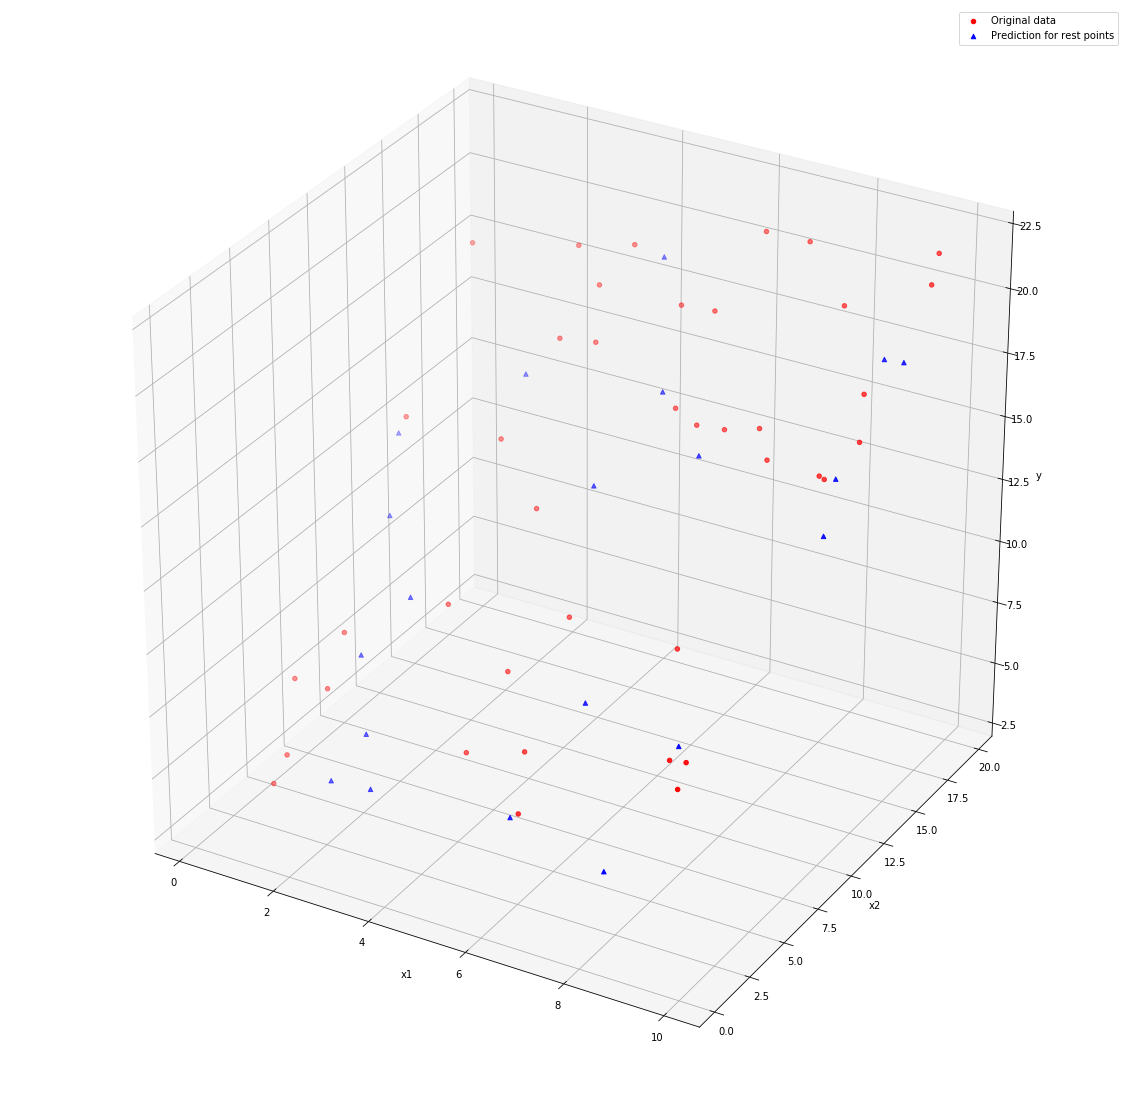

In [9]:
#Predictions has been made above, but additionaly I will make a plot of them.

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xs = available_info['x1']
ys = available_info['x2']
zs = available_info['y']
ax.scatter(xs, ys, zs, c='r', marker='o', label='Original data')

xs = for_prediction['x1']
ys = for_prediction['x2']
zs = predictions2
ax.scatter(xs, ys, zs, c='b', marker='^', label='Prediction for rest points')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.legend()
plt.show()
    
